# 第13章 平稳时间序列

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

data = pd.read_stata('../2_Data/Data-2e/gdp_china.dta')
data.set_index('year', inplace=True)
data['lny'] = np.log(data['y'])
data['dlny']  = data['lny'].diff()
data['dy'] = (data['y'] - data['y'].shift(1))/data['y'].shift(1)

## 13.1 时间序列的自相关

定义  k阶自协方差
autocovanriance of oder k
$$\gamma_k\equiv Cov(y_t,y_{t-k})=E[(y_t-\mu)(y_{t-K}-\mu)]$$
- $\mu$ 为总体均值（$E(y)$）
- 反映了同一变量相隔k期之间的自相关程度
- $k=0$ 时，$\gamma_0=Var(y)$
- 估计值为样本自协方差：$$\hat\gamma_k \equiv = \frac{1}{T-k}\sum_{t=1}^{T-k}(y_t-\overline y)(y_{t+k}-\overline y)$$

定义 k阶自相关系数
autocorrelation of oder k
$$\rho_k \equiv \frac{Cov(y_t,y_{t+k})}{Var(y_t)}$$
- 自相关系数是自协方差的标准化，取值范围[-1,1]
- 估计值为 $$\hat\rho_k \equiv \frac{\hat\gamma_k}{\hat\gamma_0}$$
	- 其中$\hat\rho_0 \equiv \frac{1}{T-1}\sum_{i=1}^T (y_t-\overline y)^2$ 为样本方差

$\rho_k$ 不依赖于具体时间，仅是滞后阶数k的函数，称为<span style="color:#00b0f0">自相关函数（Auto-correlation function，ACF）</span>

（k，$\rho_k$）画出图，称为<span style="color:#00b0f0">自相关图（correlogram）</span>


<Axes: xlabel='year', ylabel='y'>

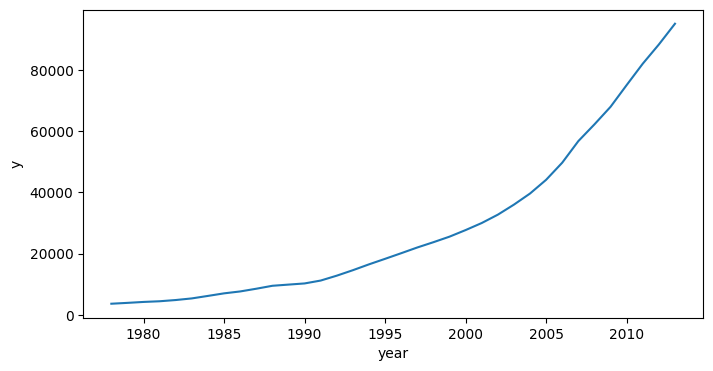

In [2]:
# 时间序列的趋势图
fig = plt.figure(figsize=(8,4))
sns.lineplot(x='year', y='y', data=data)

<Axes: xlabel='year', ylabel='lny'>

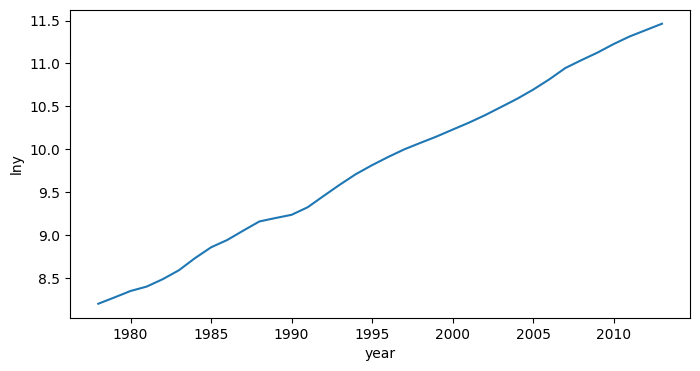

In [3]:
# 对数时间序列的趋势图
fig = plt.figure(figsize=(8,4))
sns.lineplot(x='year', y='lny', data=data)

<Axes: xlabel='year', ylabel='dlny'>

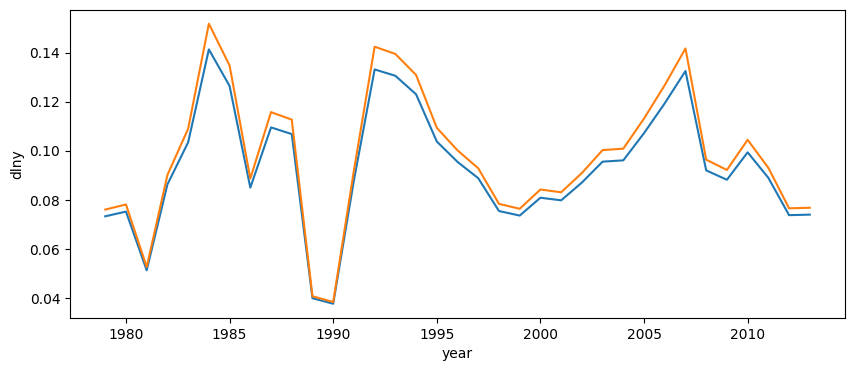

In [4]:
# 对比
fig = plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='dlny', data=data)
sns.lineplot(x='year', y='dy', data=data)

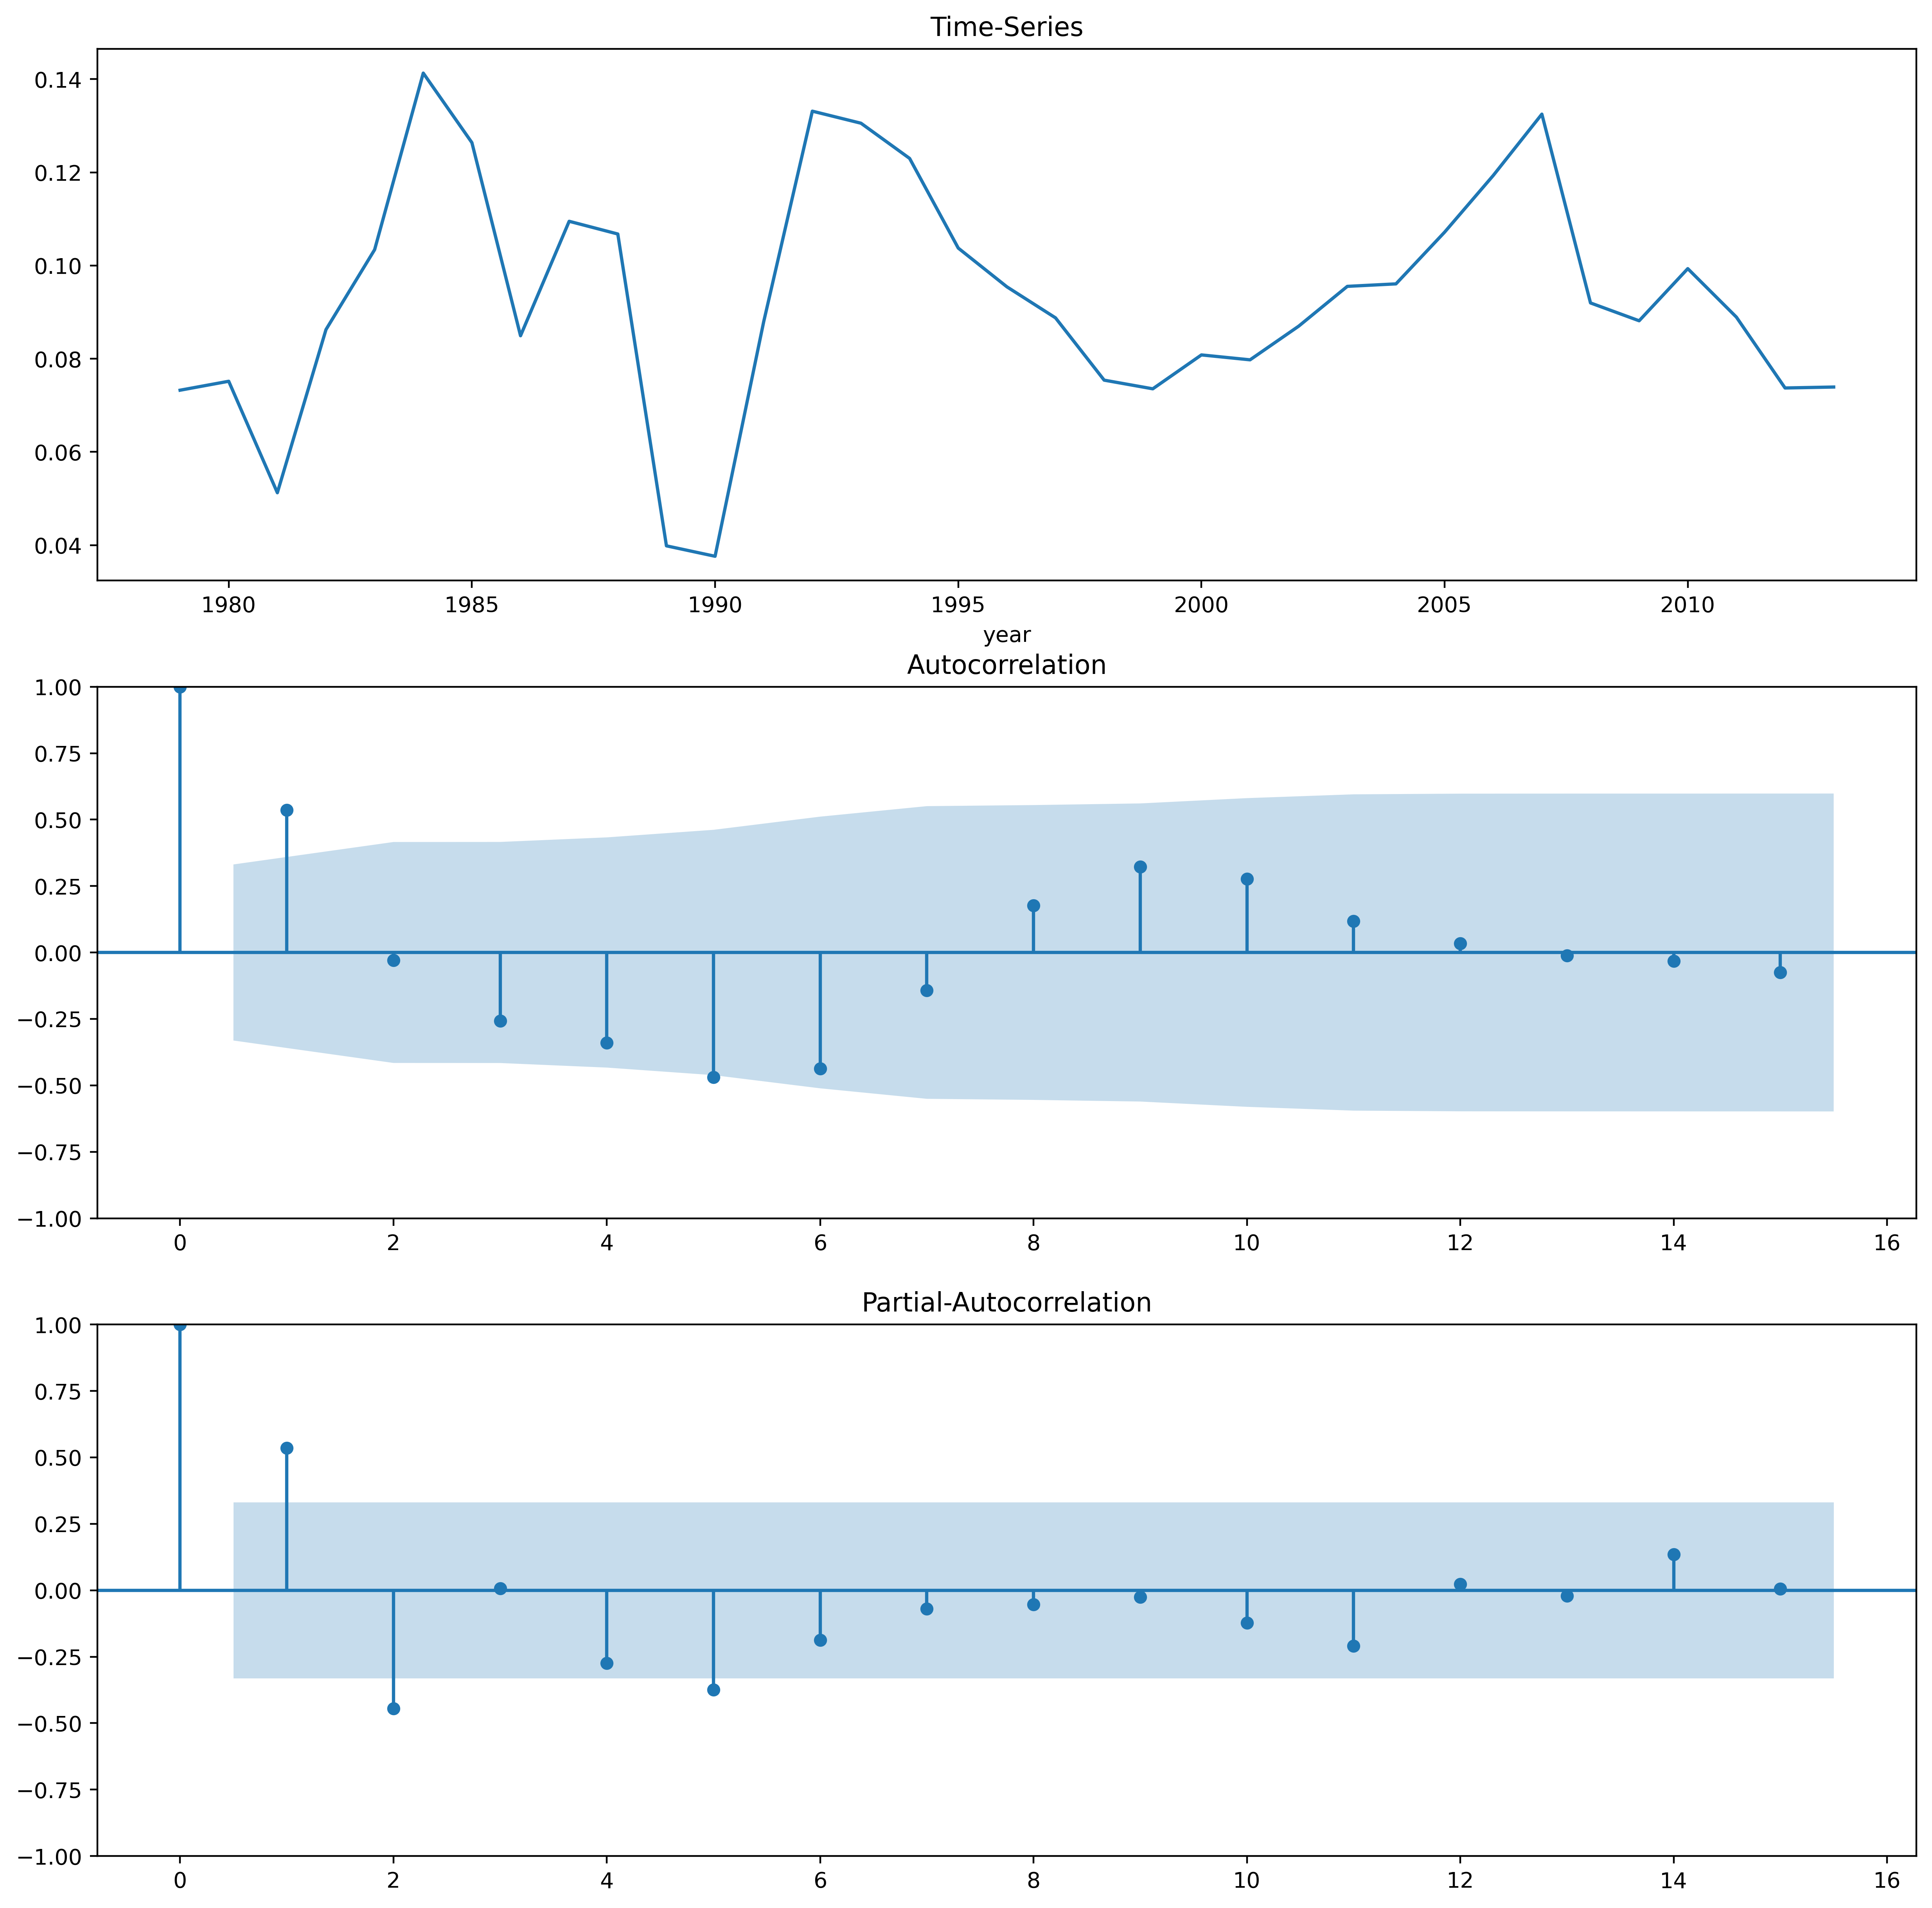

,Lags,ACF,PACF,Q,Prob(Q)
0,1,0.536006,0.551770,10.942826,9.396672e-04
1,2,-0.029844,-0.483220,10.977778,4.132432e-03
2,3,-0.257885,0.019638,13.669137,3.391922e-03
3,4,-0.340541,-0.333263,18.513620,9.791083e-04
4,5,-0.468739,-0.465579,27.998054,3.643067e-05
5,6,-0.437134,-0.281811,36.531051,2.173118e-06
6,7,-0.142519,-0.163810,37.470463,3.819809e-06
7,8,0.177405,-0.141457,38.979982,4.957594e-06
8,9,0.321968,-0.081307,44.143216,1.328198e-06
9,10,0.276829,-0.245950,48.112867,5.919004e-07


In [5]:
from cq import acfgram
data = data.dropna()

ac = acfgram(data['dlny'],lags=15)
ac

## 13.2 一阶自回归

用过去值来预测当前值，一阶自回归（AR(1)）
$$y_t = \beta_0+\beta_1 y_{t-1}+\epsilon_t \qquad (t=2,\cdots,n) \tag{13.6}$$
- 扰动项 $\epsilon_t$ 为白噪声
- 扰动项 $\epsilon_t$ 无自相关，意味着任意不同期的扰动项协方差为0，是球形扰动项
- OLS估计是一致的，但损失第一个数据
- 可使用MLE，但需加速扰动项服从正态分布

In [6]:
# 使用OLS回归
data2012 = data[data.index<2013].dropna()
mod_ols = sm.OLS(endog=data2012['dlny'], 
             exog=sm.add_constant(data2012['dlny'].shift(1)),
             missing='drop') # 缺失值直接drop
res_ols = mod_ols.fit(cov_type='HC1', use_t=True)
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   dlny   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     12.99
Date:                Mon, 13 May 2024   Prob (F-statistic):            0.00108
Time:                        01:26:45   Log-Likelihood:                 80.961
No. Observations:                  33   AIC:                            -157.9
Df Residuals:                      31   BIC:                            -154.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0438      0.014      3.039      0.0

In [7]:
# 使用MLE
from statsmodels.tsa.ar_model import AutoReg
mod_mle = AutoReg(data2012['dlny'], lags=1)
res_mle = mod_mle.fit(cov_type='HC1',use_t=True)
print(res_mle.summary())

                            AutoReg Model Results                             
Dep. Variable:                   dlny   No. Observations:                   34
Model:                     AutoReg(1)   Log Likelihood                  80.961
Method:               Conditional MLE   S.D. of innovations              0.021
Date:                Mon, 13 May 2024   AIC                           -155.922
Time:                        01:26:45   BIC                           -151.433
Sample:                             1   HQIC                          -154.412
                                   34                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0438      0.014      3.039      0.005       0.014       0.073
dlny.L1        0.5363      0.149      3.604      0.001       0.233       0.840
                                    Roots           

e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
from math import exp
# 预测值
a = res_ols.predict([1,data.loc[2013,'dlny']])
# OLS模型回归后的预测：
## - 参数是对应的 const + 其他自变量的值
b = res_mle.predict(len(data['lny']),len(data['lny']))
# AutoReg模型回归后的预测：
## - 参数是start, end

resid = exp(a + data.loc[2012,'lny']) - data.loc[2013,'y']
resid

e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\NINGMEI\AppData\Local\Temp\ipykernel_134436\669965748.py:10: DeprecationWarning: Conversion of an array with ndim > 0 t

906.3107431212557

## 13.3 高阶自回归

高阶自回归（AR(p)）:
$$y_t = \beta_0+\beta_1 y_{t-1}+\cdots+\beta_p y_{t-p}+\epsilon_t  \tag{13.6}$$
但通常我们并不知道p是多少，需要估计出p是多少。有三个方法：
1. 由大到小的序贯t规则：
	- 设一个最大滞后值，看最大滞后期的系数是否显著，不显著就往小了进行估计，直至显著。
2. 使用信息准则：
	- 使AIC和BIC最小的p，AIC在大样本中会高估，取两者滞后阶数的大者
3. 检验模型残差的自相关性(Q检验)，如存在，继续扩大。

In [9]:
from cq import estimate_p

data = data[data.index< 2013]
df = estimate_p(data, 'dlny', 6)
df

e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params.index[-1], res.nobs, res.pvalues[-1], res.aic, res.bic
e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params.index[-1], res.nobs, res.pvalues[-1], res.aic, res.bic
e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

index,nobs,p-value,AIC,BIC
dlny_l1,33.0,0.000313,-157.9223[min],-154.9293[min]
dlny_l2,32.0,0.00336,-157.398728,-153.00152
dlny_l3,31.0,0.90479[>0.05],-153.816216,-148.080267
dlny_l4,30.0,0.12324[>0.05],-150.839698,-143.833711
dlny_l5,29.0,0.031682,-148.910347,-140.706572
dlny_l6,28.0,0.07992[>0.05],-149.345486,-140.020054


In [10]:
from statsmodels.tsa.ar_model import ar_select_order

mod = ar_select_order(data['dlny'], maxlag=6
                      ,ic='bic',glob=True)
print(mod.ar_lags)

[1, 2, 5]


e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## 13.4 自回归分布滞后模型

### autoregressive distributed lag model

在自回归模型中，引入其他解释变量，$ARDL(p,q)$
$$y_t = \beta_0 +\beta_1 y_{t-1}+\cdots+\beta_p y_{t-p}+\gamma_1 x_{t-1}+\cdots+\gamma_q x_{t-q}+\epsilon_t \tag{13.11}$$
- p为y的滞后阶数
- q为x的滞后阶数
- 还可引入更多的解释变量，如z的r阶滞后

对于（p,q）的选择，可使用：
- 信息准则
- 序贯检验

### 长期效应 or 长期乘数
- 因y和x均为平稳序列，各滞后期序列的均值均为 $y^*$ 和 $x^*$。对（13.11）两边同时求期望，整理后可得：
- $$\frac{dy^*}{dx^*}=\frac{\gamma_1+\cdots+\gamma_q}{1-\beta_1-\cdots-\beta_p}$$


In [11]:
from statsmodels.tsa.ardl.model import ARDL

data_ = pd.read_stata('../2_Data/Data-2e/border.dta')
endog = data_['border']

exog = data_[['drought','diff','age','rival','wall','unified']]
exog_lags = {
             'drought':[1],
             'diff':0,
             'age':0,
             'rival':0,
             'wall':0,
             'unified':0
             }
mod_ardl = ARDL(endog,2, exog, exog_lags)
res_ardl = mod_ardl.fit()
print(res_ardl.summary())

                                  ARDL Model Results                                 
Dep. Variable:                        border   No. Observations:                  213
Model:             ARDL(2, 1, 0, 0, 0, 0, 0)   Log Likelihood                -312.766
Method:                      Conditional MLE   S.D. of innovations              1.065
Date:                       Mon, 13 May 2024   AIC                            645.532
Time:                               01:26:45   BIC                            679.050
Sample:                                    2   HQIC                           659.081
                                         213                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8190      0.412      1.988      0.048       0.007       1.631
border.L1      1.5183      0.054     27.951      0.000       1.411       1.

In [12]:
# drought的长期乘数
res_ardl.params
lrm_drought  = res_ardl.params['drought.L1']/(1-res_ardl.params['border.L1']-res_ardl.params['border.L2'])
lrm_drought 

-15.671094018656975

## 13.5 误差修正模型

## 13.6 移动平均与ARMA模型

## 13.7 脉冲响应函数

e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


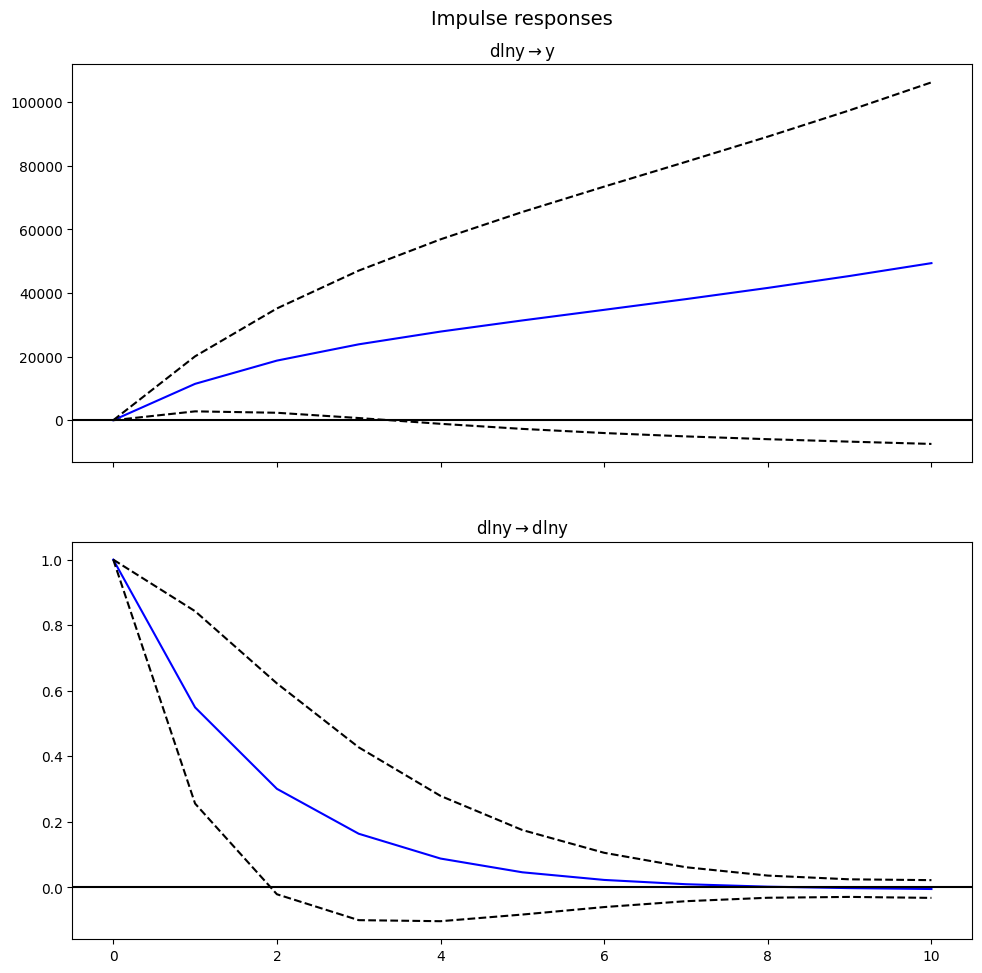

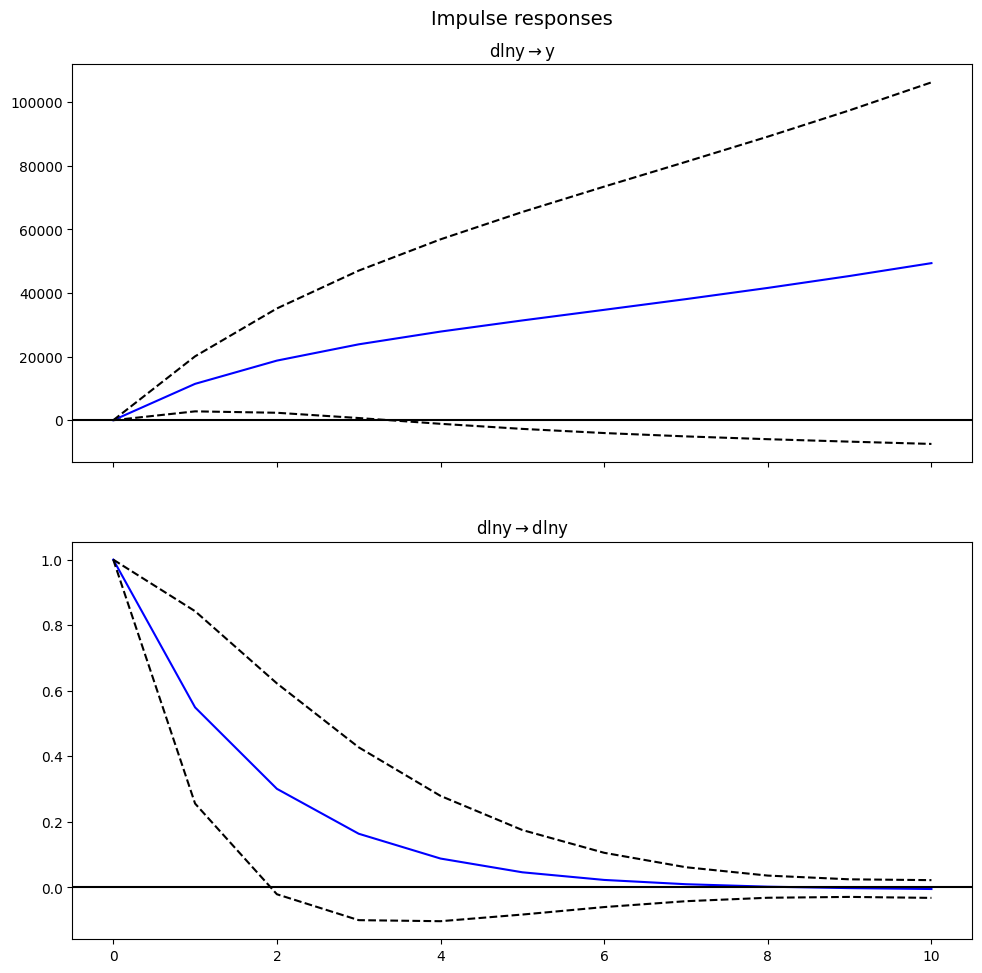

In [13]:
from statsmodels.tsa.api import VAR


data = pd.read_stata('../2_Data/Data-2e/gdp_china.dta')
data['year'] = pd.to_datetime(data['year'], format='%Y',exact=True)
data.set_index('year',inplace=True)
data['dlny'] = np.log(data['y']) - np.log(data['y']).shift(1)

model = VAR(data,missing='drop')
results = model.fit(1)
irf = results.irf(10)
irf.plot(impulse='dlny',orth=False)

## 13.8 向量自回归过程

## 13.9 VAR的脉冲响应函数

## 13.10 格兰杰因果检验

## 13.11 VAR的Python命令及实例

![alt text](../pic/VAR流程.svg)

> 在开始建立模型之前，都要先观察数据的时间趋势

,inf,unem,dinf
quarter,,,
1960-04-01,NaN,0.058333,NaN
1960-07-01,0.006898,0.051000,NaN
1960-10-01,0.020659,0.052667,0.013761
1961-01-01,0.024207,0.056000,0.003548
1961-04-01,0.003632,0.051333,-0.020575
...,...,...,...
2001-01-01,0.031898,0.041000,0.003792
2001-04-01,0.041139,0.040333,0.009241
2001-07-01,0.029758,0.040333,-0.011381


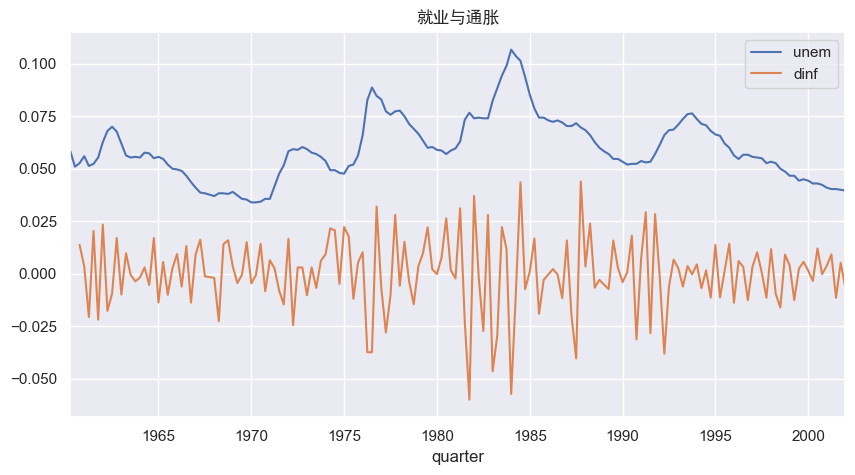

In [14]:
from matplotlib.font_manager import FontProperties
from statsmodels.tsa.base.datetools import dates_from_str
# 指定字体
font_path = r'E:\fontsss\FONT\msfont\simhei.ttf'  # 根据你的操作系统，指定中文字体的路径
font_prop = FontProperties(fname=font_path, size=12)

macro_swatson = pd.read_stata('../2_Data/Data-2e/macro_swatson.dta')
macro_swatson.set_index('quarter', inplace=True)

sns.set_theme(style='darkgrid')
macro_swatson[['unem','dinf']].plot(figsize=(10,5))
plt.title('就业与通胀', fontproperties=font_prop)

macro_swatson

#### 1. 估计滞后阶数

In [15]:
from cq import estimate_p
estimate_p(macro_swatson, 'dinf', lags=3)

e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params.index[-1], res.nobs, res.pvalues[-1], res.aic, res.bic
e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params.index[-1], res.nobs, res.pvalues[-1], res.aic, res.bic
e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

index,nobs,p-value,AIC,BIC
dinf_l1,165.0,0.017331,-882.627391,-876.4155
dinf_l2,164.0,0.000094,-895.9549[min],-886.6553[min]
dinf_l3,163.0,0.016910,-893.845943,-881.470942



|index	|nobs	|p-value	|AIC	  |          BIC|
|---|---|---|---|---|
|dinf_l1|	165.0|	0.017331|	-882.627391|	    -876.4155|
|dinf_l2|	164.0|	0.000094|	-895.9549[min]|	-886.6553[min]|
|dinf_l3|	163.0|	0.016910|	-893.845943	   | -881.470942|


In [16]:
estimate_p(macro_swatson, 'unem', lags=3)

e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params.index[-1], res.nobs, res.pvalues[-1], res.aic, res.bic
e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params.index[-1], res.nobs, res.pvalues[-1], res.aic, res.bic
e:\Eco-stats\eco-stats\Econometrics_CQ\1_Code\cq.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

index,nobs,p-value,AIC,BIC
unem_l1,167.0,0.0,-1430.602618,-1424.366631
unem_l2,166.0,0.0,-1503.2040[min],-1493.8680[min]
unem_l3,165.0,0.53874[>0.05],-1497.092376,-1484.668594


|index	|nobs	|p-value	|AIC	|BIC|
|---|---|---|---|---|
|unem_l1|	167.0|	0.0|	-1430.602618|	-1424.366631|
|unem_l2|	166.0|	0.0|	-1503.2040[min]|	-1493.8680[min]|
|unem_l3|	165.0|	0.53874[>0.05]|	-1497.092376|	-1484.668594|

In [17]:
from statsmodels.tsa.ar_model import ar_select_order

mod = ar_select_order(macro_swatson['dinf'], maxlag=5
                      ,ic='bic',missing='drop')
mod_ = ar_select_order(macro_swatson['unem'], maxlag=5
                      ,ic='bic',missing='drop')
print(mod.ar_lags, mod_.ar_lags)

[1, 2, 3] [1, 2]


e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


#### 2. 建模VAR(2)

e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


AttributeError: 'VARResults' object has no attribute 'hypo_test'

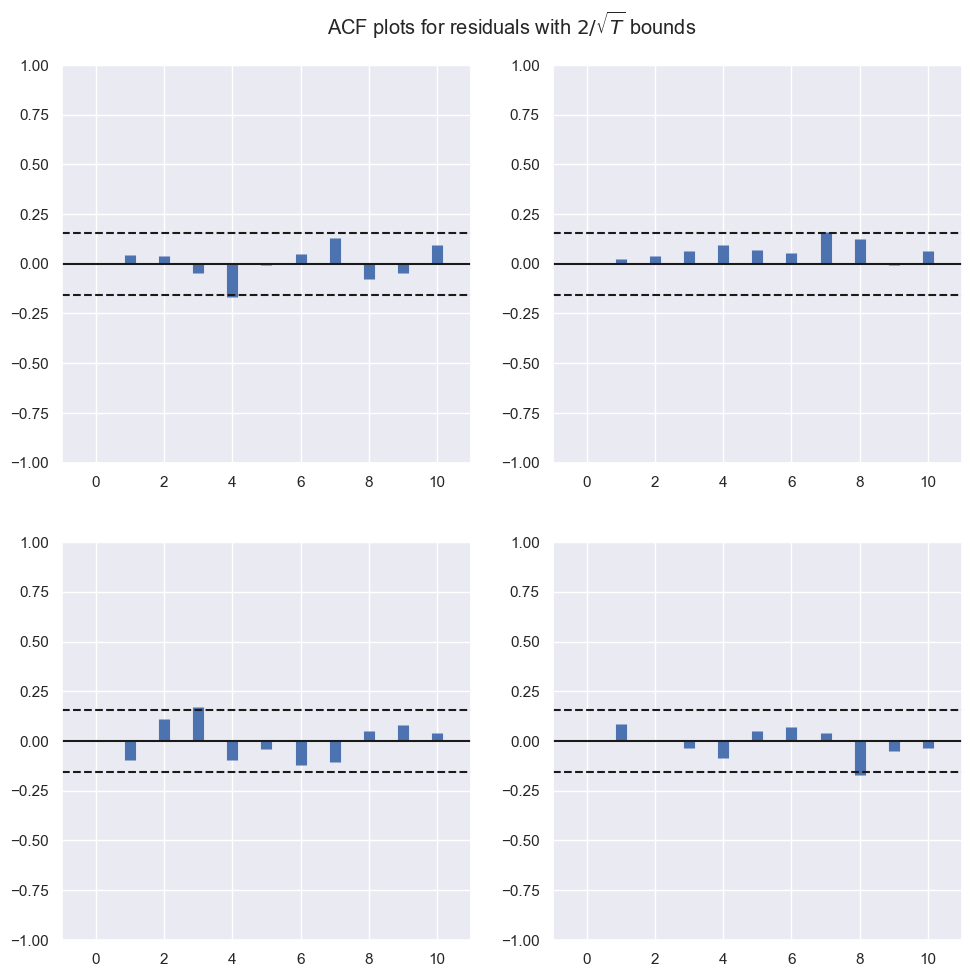

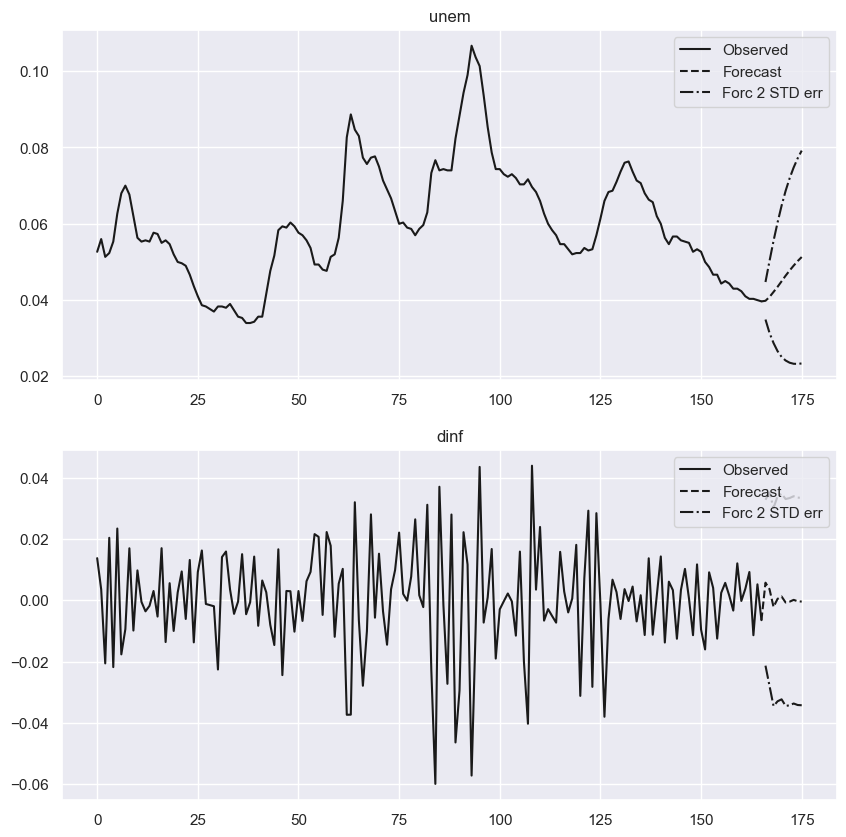

In [18]:
from statsmodels.tsa.api import VAR
data = macro_swatson[['unem','dinf']].dropna()
 
model = VAR(data)
res_var = model.fit(2 ,method='ols',verbose=True)
res_var.plot_acorr()
b = res_var.plot_forecast(10)
res_var.hypo_test('ljungbox',lags=10)

VARMAX 与 VAR 模型
两种模型类所使用的回归方法不一样,得出的结果可能细微的差别，但在显著性检验方面能得到一致的结果。
相比而言：
- VARMAX模型更通用，只需在参数order设置时进行设定，即可设定为VAR、VMA模型
    - VAR模型：order=(p, 0)
    - VMA模型：order=(0, q)
    - VARMA模型：order=(p, q)
- VAR模型的解释性更强，可以直观的看出模型的各项影响因素，适合用于解释因果关系。

In [ ]:
from statsmodels.tsa.api import VARMAX

mod_varmax = VARMAX(data, order=(2, 0), trend='c')
res_varmax = mod_varmax.fit(maxiter=1000, disp=False)
print(res_varmax.summary())

#### 3.各种检验

`statsmodels.tsa.vector_ar`库中的`VAR`模型有一个核心的基本假定：

- 该 VAR 类假定传递的时间序列是平稳的。非平稳数据或趋势数据通常可以通过先差分或其他方法转换为平稳数据。对于非平稳时间序列的直接分析，标准稳定的VAR（p）模型是不合适的。

因此，在VAR模型中所提供的检测方法中，不涉及平稳性检验。

- 3.1 联合显著性的wald检验
  - `statsmodels`库中对`VARResults`没有提供`wald_test`、`f_test`、`t_test`的api接口
- 3.2 平稳性检验
  - 通过特征值进行平稳性检验。    
- 3.3 格兰杰因果检验
  - 参数：
    - caused = 格兰杰 果
    - causing = 格兰杰 因

In [ ]:
white_test = res_var.test_whiteness()
norml_test = res_var.test_normality()
causl_test_u_d = res_var.test_causality(caused='unem',causing='dinf')
causl_test_d_u = res_var.test_causality(caused='dinf',causing='unem')

white_test.summary()

In [ ]:
norml_test.summary()

In [ ]:
causl_test_u_d.summary()

In [ ]:
causl_test_d_u.summary()

### 4. 脉冲响应函数 

res_var.irf()

In [ ]:
irf = res_var.irf()
a = irf.plot()

## 13.13 季节调整

## 13.14 日期数据的导入